<a href="https://colab.research.google.com/github/ShreyJais/ADA/blob/main/2348558_TS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ADA/AirPassengers.csv')
data

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [5]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


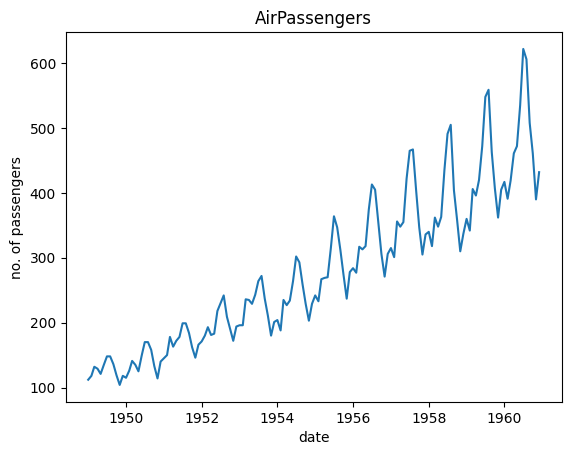

In [11]:
import matplotlib.pyplot as plt
plt.plot(data['date'],data['value'])
plt.xlabel('date')
plt.ylabel('no. of passengers')
plt.title('AirPassengers')
plt.show()

In [12]:
import plotly.express as px
px.line(data,x='date',y='value',title='AirPassengers',labels={'date':'date','value':'no. of passengers'})

In [13]:
#plot rolling statistics
movingAverage=data['value'].rolling(window=5).mean()
movingSTD=data['value'].rolling(window=5).std()

In [14]:
px.line(x=data['date'],y=[data['value'],movingAverage,movingSTD],title='AirPassengers')

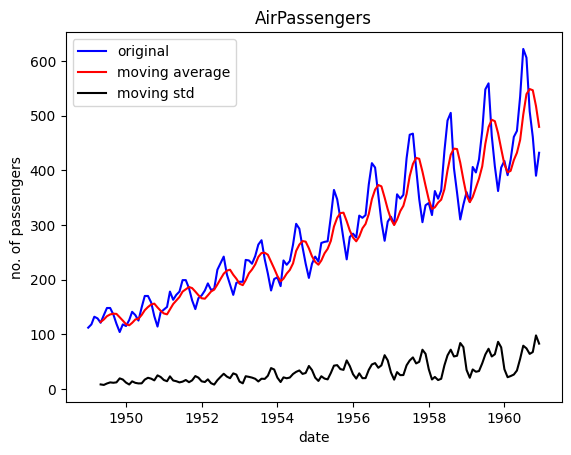

In [15]:
plt.plot(data['date'],data['value'],color='blue',label='original')
plt.plot(data['date'],movingAverage,color='red',label='moving average')
plt.plot(data['date'],movingSTD,color='black',label='moving std')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('no. of passengers')
plt.title('AirPassengers')
plt.show()

diffrent window size

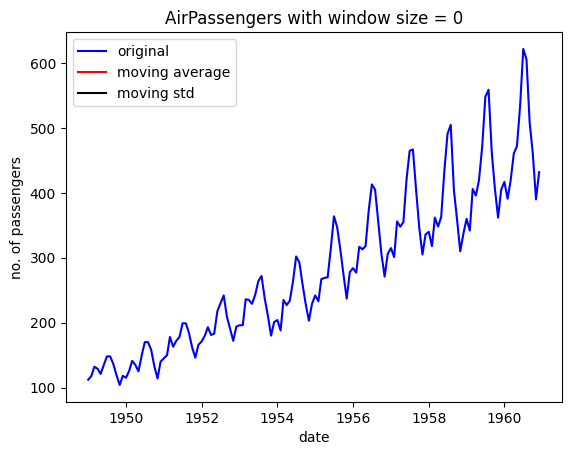

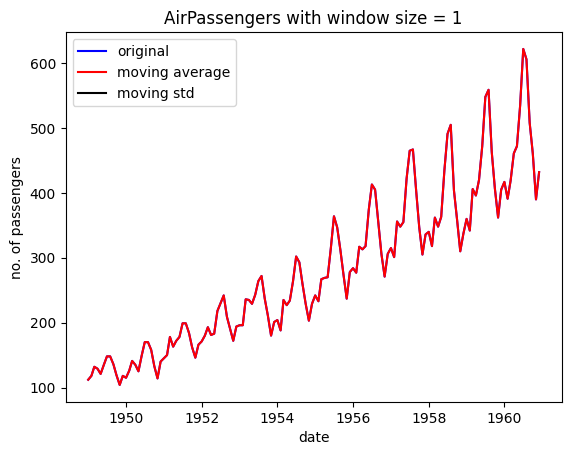

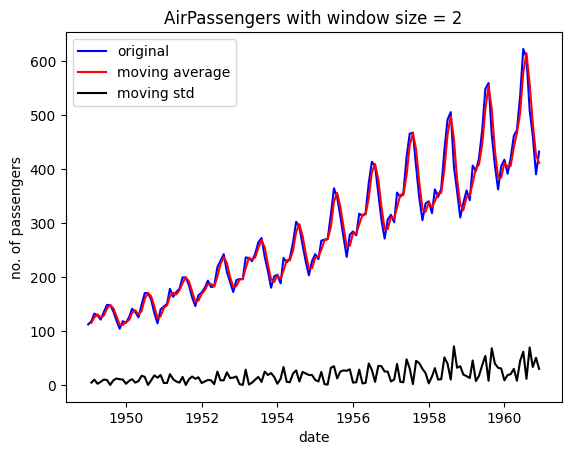

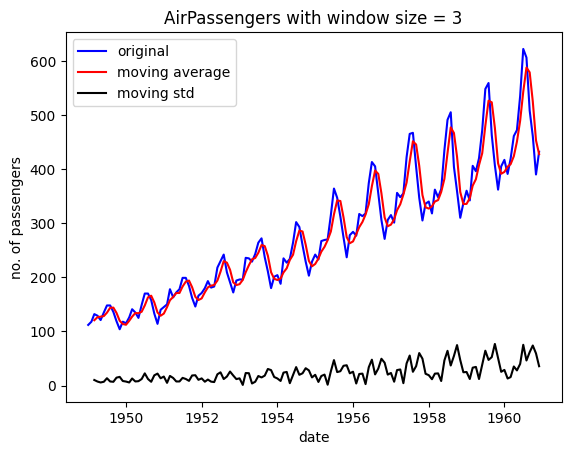

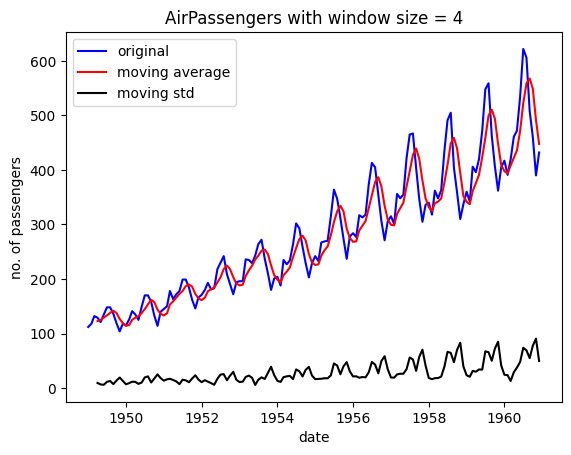

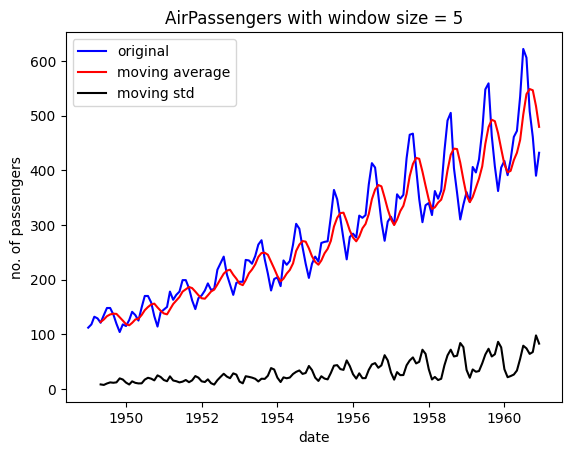

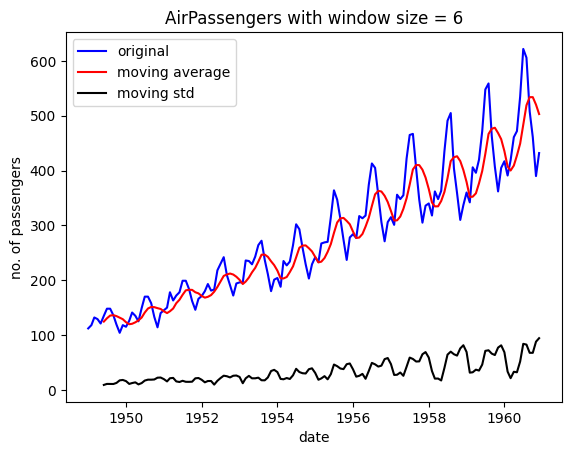

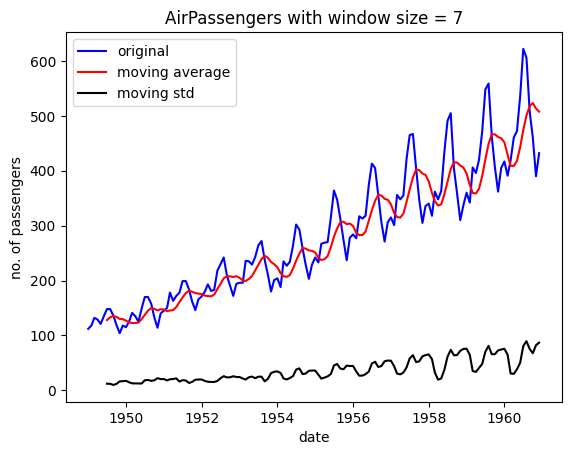

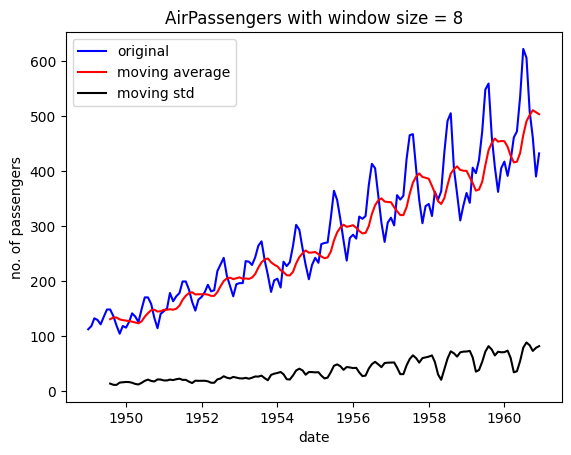

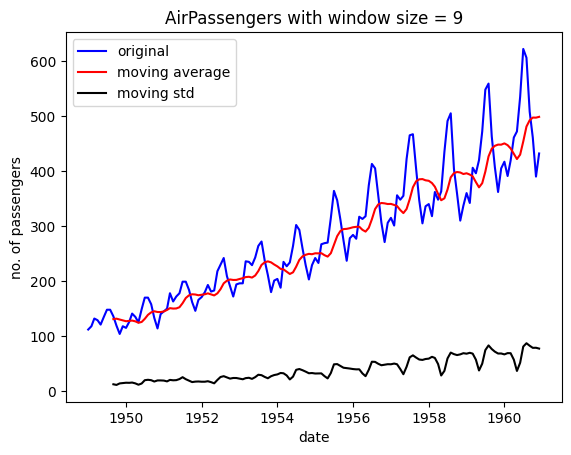

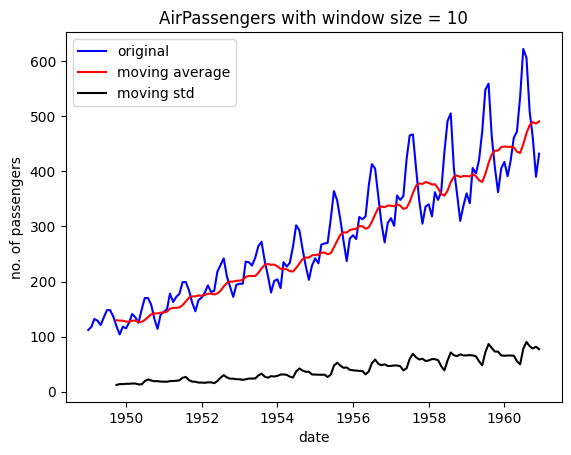

In [16]:
#plot rolling statistics
for i in range(11):
  movingAverage=data['value'].rolling(window=i).mean()
  movingSTD=data['value'].rolling(window=i).std()
  plt.plot(data['date'],data['value'],color='blue',label='original')
  plt.plot(data['date'],movingAverage,color='red',label='moving average')
  plt.plot(data['date'],movingSTD,color='black',label='moving std')
  plt.legend(loc='best')
  plt.xlabel('date')
  plt.ylabel('no. of passengers')
  plt.title('AirPassengers with window size = ' + str(i))
  plt.show()

ADF Test
photo

In [17]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
  print('Results of Dickey-Fuller Test:')
  dftest=adfuller(dataset,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

adf_test(data['value'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


* if Test Statistic  < Critical Value and p-value < 0.05 we reject null hypothesis (Non Satationary)
* else we fail to reject null hypothesis (Satationary)

kpps

In [18]:
from statsmodels.tsa.stattools import kpss
def kpss_test(dataset):
  print('Results of KPSS Test:')
  kpsstest=kpss(dataset, regression='c', nlags='auto')
  kpss_output=pd.Series(kpsstest[0:3],index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key]=value
  print(kpss_output)
kpss_test(data['value'])

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-18-80126412f855>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




* if Test Statistic > Critical Value and p-value > 0.05 we reject null hypothesis (Non Satationary)
* else we fail to reject null hypothesis (Satationary)

<Axes: >

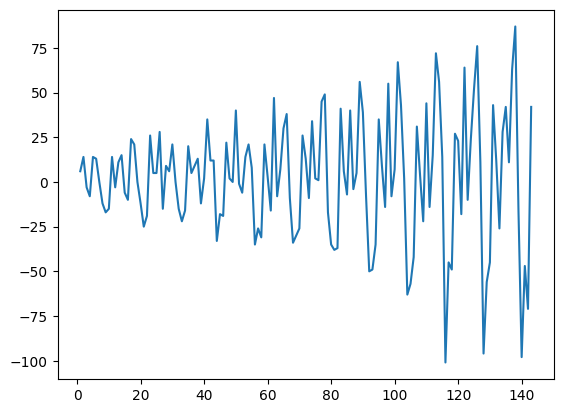

In [19]:
#Making a time Series Stationary
#differencing
data['value_diff']=data['value']-data['value'].shift(1)
data['value_diff'].dropna().plot()

<Axes: >

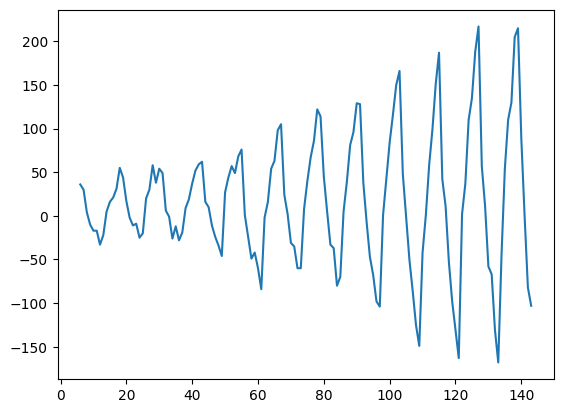

In [20]:
#seasonal Diffrencencing
n=6
data['value_diff_seasonal']=data['value']-data['value'].shift(n)
data['value_diff_seasonal'].dropna().plot()

<Axes: >

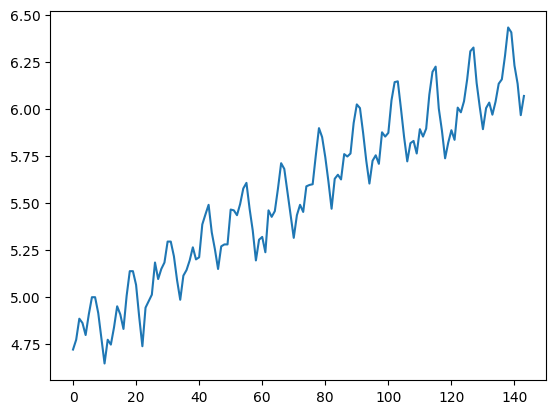

In [21]:
#Tranformation (log(value range is more), sqroot(value is huge), power(value is tiny))
import numpy as np
data['log_data']=np.log(data['value'])
data['log_data'].plot()

In [22]:
adf_test(data['log_data'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [23]:
kpss_test(data['log_data'].dropna())

Results of KPSS Test:
Test Statistic           1.668651
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-18-80126412f855>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




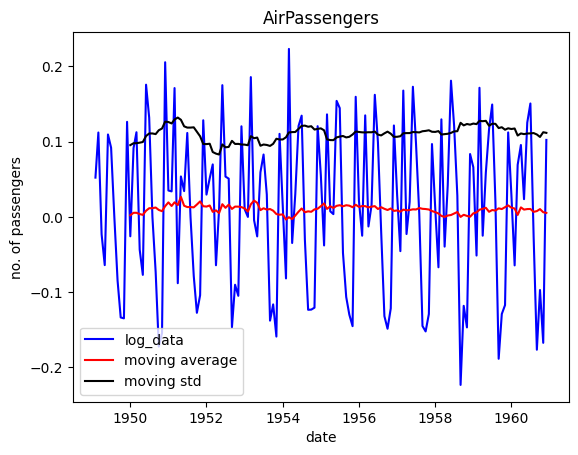

In [24]:
windowsize=12
data['log_data']=data['log_data']-data['log_data'].shift(1)
movingAverage=data['log_data'].rolling(window=windowsize).mean()
movingSTD=data['log_data'].rolling(window=windowsize).std()
plt.plot(data['date'],data['log_data'],color='blue',label='log_data')
plt.plot(data['date'],movingAverage,color='red',label='moving average')
plt.plot(data['date'],movingSTD,color='black',label='moving std')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('no. of passengers')
plt.title('AirPassengers')
plt.show()


ADF

* if Test Statistic > Critical Value and p-value > 0.05 we reject null hypothesis (Non Satationary)
* else we fail to reject null hypothesis (Satationary)

In [25]:
adf_test(data['log_data'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


Satationary

In [26]:
kpss_test(data['log_data'].dropna())

Results of KPSS Test:
Test Statistic           0.038304
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-18-80126412f855>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




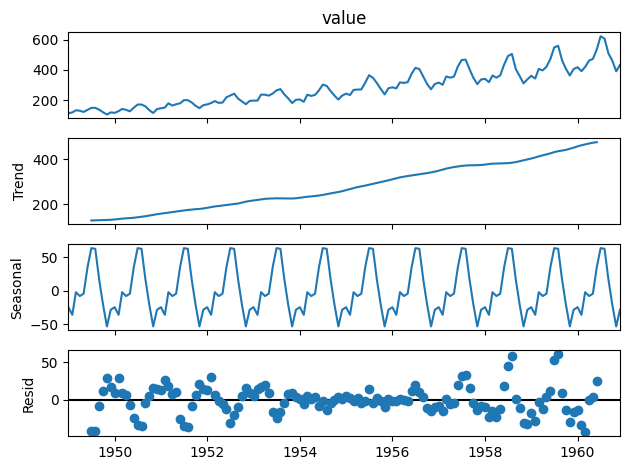

In [27]:
data.set_index('date', inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(data['value'],model='additive')
decompose.plot()
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

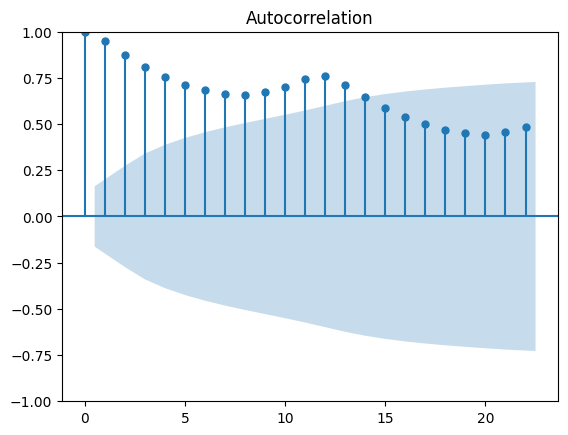

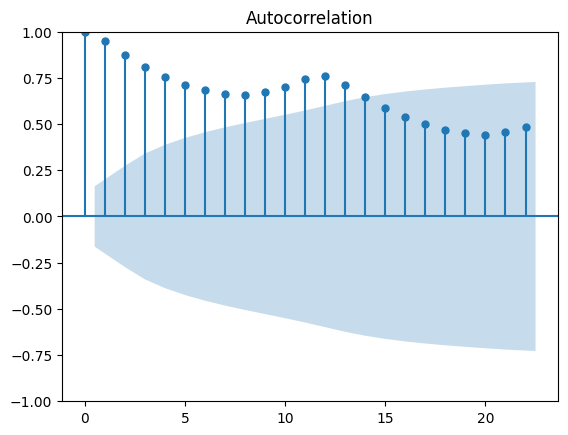

In [29]:
plot_acf(data['value'])

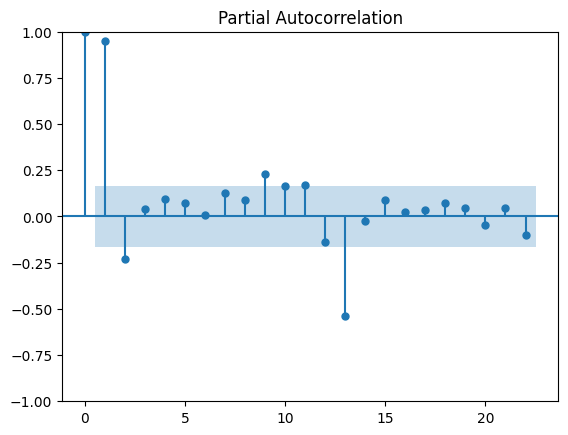

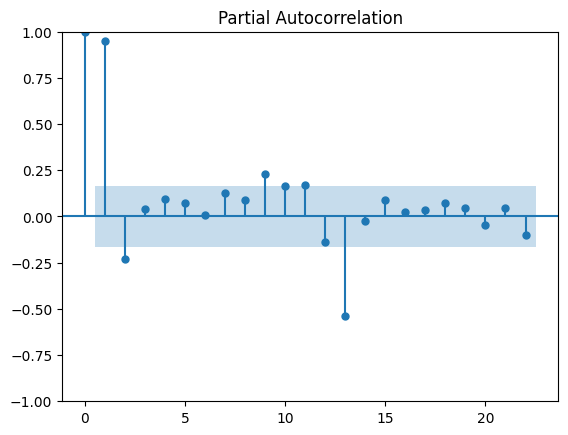

In [30]:
plot_pacf(data['value'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



plotting AR model


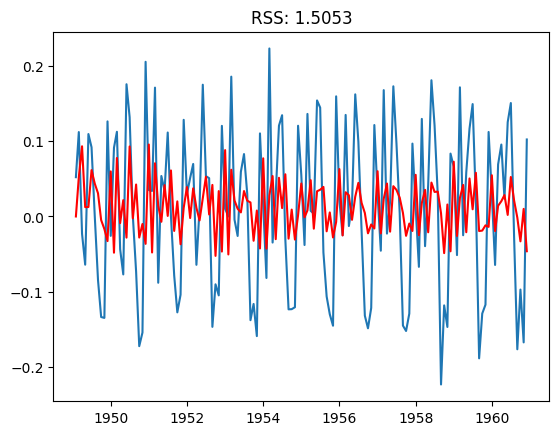

In [31]:
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA from the correct module
ts_log_diff = np.log(data['value']).diff().dropna()
model = ARIMA(ts_log_diff, order=(2, 1, 2)) # Use the updated ARIMA class
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))
print('plotting AR model')

In [32]:
test = pd.DataFrame(columns=["Value_diff","Value.log_diff"], index=["AR","MA","ARIMA"])
test

,Value_diff,Value.log_diff
AR,NaN,NaN
MA,NaN,NaN
ARIMA,NaN,NaN


In [35]:
# Calculate the values for each model
ar_value_diff = data['value'].diff().dropna()
ma_value_diff = data['value'].diff().diff().dropna()
arima_value_diff = data['log_data'].diff().dropna()

# Calculate the log difference for each model
ar_value_log_diff = np.log(data['value']).diff().dropna()
ma_value_log_diff = np.log(data['value']).diff().diff().dropna()
arima_value_log_diff = arima_value_diff

# Fill the DataFrame with the calculated values
test.loc["AR","Value_diff"] = ar_value_diff.mean()
test.loc["AR","Value.log_diff"] = ar_value_log_diff.mean()
test.loc["MA","Value_diff"] = ma_value_diff.mean()
test.loc["MA","Value.log_diff"] = ma_value_log_diff.mean()
test.loc["ARIMA","Value_diff"] = arima_value_diff.mean()
test.loc["ARIMA","Value.log_diff"] = arima_value_log_diff.mean()

test

,Value_diff,Value.log_diff
AR,2.237762,0.00944
MA,0.253521,0.000353
ARIMA,0.000353,0.000353
